# UCK 358E – Introduction to Artificial Intelligence 
## Homework 1
## Deadline: April 07, 2024




#### Name: Nisa Nur ELMAS 
#### Student Number: 110210031

### In this homework, you will focus on predicting type of trees in a forest. There are 7 different tree types in the dataset, the label is named as "Cover_Type" and you will train models to predict the correct type for the test data. Each section below contains clear explanations about the tasks. It is not required to write a separate report for the homework. Make all of your explanations and discussions inside the Jupiter Notebook. Use the Notebook as your report. Be aware that If you deliver a Notebook containing only codes without explanation and discussion, you will lose majority of your points. 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## import any library that you will use


# Load Data (don't change anything in this part, just run it) 

In [79]:
df = pd.read_csv("datasetHW.csv")
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [80]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [81]:
df_new = df[["Elevation", "Hillshade_9am", "Horizontal_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Cover_Type"]]
X = df_new.drop(["Cover_Type" ], axis=1)
y = df_new[["Cover_Type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # don't change random state

In [82]:
X_train

,Elevation,Hillshade_9am,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points
765,2916,202,67,1507
5927,2356,247,210,1050
14032,2977,195,696,878
6187,2415,131,108,638
3872,2299,167,497,1159
...,...,...,...,...
5191,2189,254,0,525
13418,2317,229,0,560
5390,2962,237,95,470
860,2898,204,30,1552


In [83]:
filter_col = [col for col in df if col.startswith('Soil_Type')]
X2 = df[filter_col]
y2 = df[["Cover_Type"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42) # don't change random state

In [84]:
X_train2

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5927,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6187,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3872,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color='red'>  In part a and part b, use (X_train, y_train) for training and (X_test, y_test) for testing your model. Don't use (X_test, y_test) during training or validation. </font>

## <font color='red'> In part c, use (X_train2, y_train2) for training and (X_test2, y_test2) for testing your model. X_train2 only contains categorical features. </font>

## Part a) you have four features to train a model. You will train linear regression and logistic regression models. You are free to use sklearn in this part 

### a1) Train linear regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. (Remember linear regression is for regression tasks, you need to round the prediction to use it for classification tasks) 

In [85]:
# Without Normalization:

lin_reg = LinearRegression() #Create an object from LinearRegression class
lin_reg.fit(X_train, y_train) #Train the LinearRegression model on the training data

predicts_linreg1 = np.round(lin_reg.predict(X_test)) #Make predictions on the test data

accuracy_linreg1 = accuracy_score(y_test, predicts_linreg1) #Compute the accuracy of the predictions
print("Test Accuracy Without Normalization:", accuracy_linreg1) 

Test Accuracy Without Normalization: 0.1457231040564374


In [86]:
# With Normalization: (I used Standard Scaler algorithm to scale my data)

scaler = StandardScaler() #Create an object from StandardScaler class
X_train_scaled = scaler.fit_transform(X_train) #Scale the features in the training data
X_test_scaled = scaler.transform(X_test) #Scale the features in the test data

lin_reg.fit(X_train_scaled, y_train) #Train the LinearRegression model on the scaled training data

predicts_linreg1_norm = np.round(lin_reg.predict(X_test_scaled)) #Make predictions on the scaled test data

accuracy_linreg1_norm = accuracy_score(y_test, predicts_linreg1_norm) #Compute the accuracy of the predictions
print("Test Accuracy With Normalization:", accuracy_linreg1_norm) 


Test Accuracy With Normalization: 0.1457231040564374


### a2) Train logistic regression model with and without normalizing your data (X_train). Try to figure out whether there is overfitting or underfitting. Also plot confusion matrix and make a discussion on it. Compare the result with part a1. 

C:\Users\elmas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elmas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy Without Normalization: 0.37455908289241624


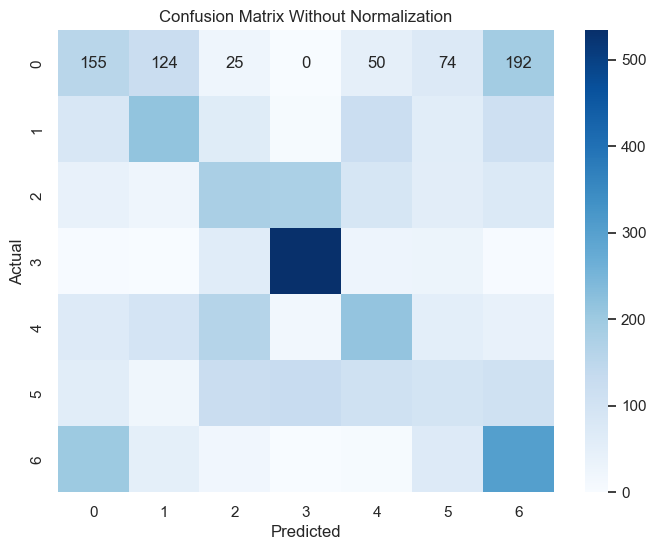

In [87]:
# Without Normalization:

log_reg = LogisticRegression() #Create an object from LogisticRegression class
log_reg.fit(X_train, y_train) #Train the LogisticRegression model on the training data

predicts_logreg1 = log_reg.predict(X_test) #Make predictions on the test data

accuracy_logreg1 = accuracy_score(y_test, predicts_logreg1) #Compute the accuracy of the predictions
print("Test Accuracy Without Normalization:", accuracy_logreg1) 

conf_matrix_logreg1 = confusion_matrix(y_test, predicts_logreg1) #Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg1, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix Without Normalization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\elmas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy With Normalization: 0.6033950617283951


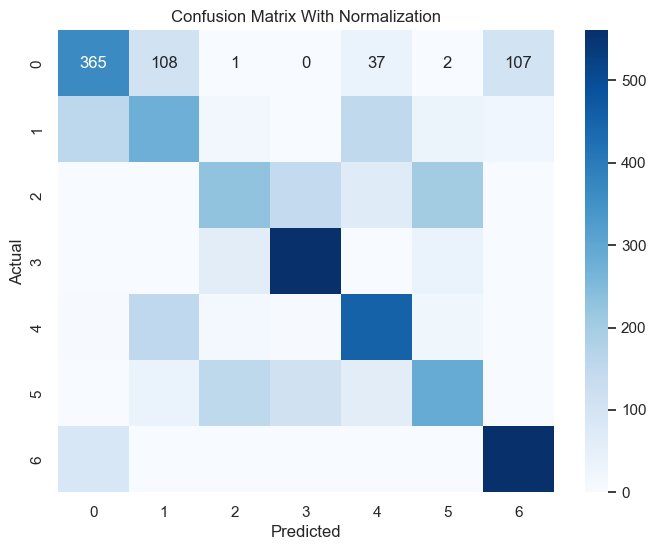

In [88]:
# With Normalization:

log_reg.fit(X_train_scaled, y_train) #Train the LogisticRegression model on the scaled training data
predicts_logreg1_norm = log_reg.predict(X_test_scaled)  #Make predictions on the scaled test data

accuracy_logreg1_norm = accuracy_score(y_test, predicts_logreg1_norm) #Compute the accuracy of the predictions
print("Test Accuracy With Normalization:", accuracy_logreg1_norm)

conf_matrix_logreg1_norm = confusion_matrix(y_test, predicts_logreg1_norm) #Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg1_norm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix With Normalization")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### a3) You only have access to four features (as presented in X_train). What are you suggesting to improve the logistic regression's model accuracy? Implement the proposed approach and compare the result with part a2

In [89]:
# Improving Methods: (I used Polynomial Features methos to increase the accuracy value.)

poly = PolynomialFeatures(degree=2)  #Create an object from PolynomialFeatures class with degree 2
X_train_poly = poly.fit_transform(X_train_scaled) #Generate polynomial features for the scaled training data
X_test_poly = poly.transform(X_test_scaled) #Generate polynomial features for the scaled test data

log_reg.fit(X_train_poly, y_train) #Train the LogisticRegression model
predicts_logreg_poly = log_reg.predict(X_test_poly) #Make predictions on the test data

accuracy_logreg_poly = accuracy_score(y_test, predicts_logreg_poly) #Compute the accuracy of the predictions
print("Test Accuracy With Polynomial Features:", accuracy_logreg_poly)


Test Accuracy With Polynomial Features: 0.6536596119929453


C:\Users\elmas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elmas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Part b) Again you have four features to train a model. You will train linear regression and logistic regression models. But, in this time, you need to develop your algorithm from scratch without using a library such as sklearn. (You can benefit from the codes available in ninova)

### b1) Implement linear regression and logistic regression from scratch and train models for your problem. Give comments in each line of your algorithms to explain what is this line for. Compare your result with a1, a2. 

C:\Users\elmas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\elmas\AppData\Local\Temp\ipykernel_10352\535455560.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  J_history[i] = computeCostMulti(X, y, theta) #Add cost function values to array


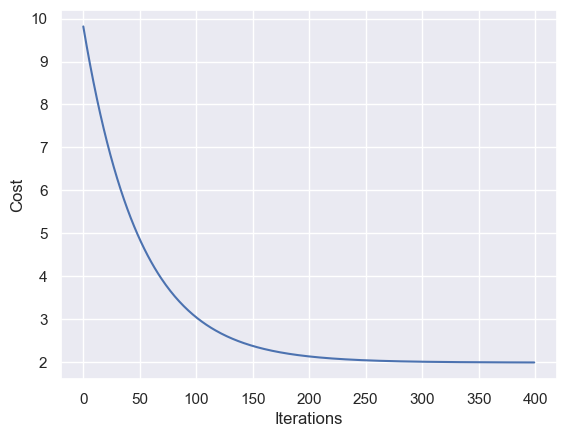

Test Accuracy of Linear Regression (No Library): 0.1457231040564374


In [90]:
# Linear Regression from Scratch (The result is same with using library or no library.)

def featureNormalize(X): #Define a feature normalization function
    mu = np.mean(X, axis=0) #Determine the mean
    sigma = np.std(X, ddof=1, axis=0) #Determine the standard deviation  
    X_norm = (X - mu) / sigma #Normalize the feature using the mean and standard deviation
    return X_norm, mu, sigma 

def computeCostMulti(X, y, theta): #Define a cost function
    h = np.dot(X, theta) - y   #Determine the hypothesis
    J = np.sum(np.square(h)) / (2 * X.shape[0]) #Determine the cost function using hypothesis
    return J

def gradientDescentMulti(X, y, alpha, num_iters): #Define a gradient descent function
    theta = np.zeros((X.shape[1], 1))  #Add a column of zeros to data X for theta
    J_history = np.zeros(num_iters) #Create an array for cost function values
    for i in range(num_iters):  #For number of iterations
        h = np.dot(X, theta) #Find the hypothesis
        theta = theta - (alpha / X.shape[0]) * np.dot(X.T, h - y) #Rewrite theta with gradient descent
        J_history[i] = computeCostMulti(X, y, theta) #Add cost function values to array
    return theta, J_history

def predict(X, theta): #Define a predict function
    predictions = np.dot(X, theta) #Determine predictions as dot product of X and theta
    return predictions

X_train_linreg2, mu, sigma = featureNormalize(X_train) #Normalize the features obtaining mean and standard deviation
X_train_linreg2 = np.hstack((np.ones((X_train_linreg2.shape[0], 1)), X_train_linreg2)) #Add a column for the intercept term

X_test_linreg2, mu, sigma = featureNormalize(X_test) #Normalize the features obtaining mean and standard deviation
X_test_linreg2 = np.hstack((np.ones((X_test_linreg2.shape[0], 1)), X_test_linreg2)) #Add a column for the intercept term

theta = np.zeros(4) #Set theta value for gradient descent
alpha = 0.01 #Set alpha value for gradient descent
num_iters = 400 #Set number of iterations for gradient descent

theta, J_history = gradientDescentMulti(X_train_linreg2, y_train, alpha, num_iters) #Use gradient descent to find theta and J_history values

plt.figure() #Plot the cost function over iterations
plt.plot(np.arange(num_iters), J_history) #Add num_iters and J_history values to plot
plt.xlabel('Iterations') #Set name of x label
plt.ylabel('Cost') #Set name of y label
plt.show() #Show plot

predictions = predict(X_test_linreg2, theta) #Make predictions on the test data
predictions = np.round(predictions) #Round predictions to the nearest integer

accuracy_linreg2 = accuracy_score(predictions, y_test) #Determine the accuracy of the predictions
print("Test Accuracy of Linear Regression (No Library):", accuracy_linreg2) #Print the test accuracy

### b2) Try to figure out why the model accuracies of linear regression and logistic regression are too different by analyzing your code. And emphasize the main assumption and corresponding line in your code that lead to performance change. 

## Part c) This time, you have a different dataset with categorical features to train a model (X_train2, y_train2). You need to write decision tree algorithm that we presented in the lecture from scratch without using any library.  

### c1) Implement decision tree algorithm (with categorical features (C4.5)) from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Plot feature importance for your model.


In [95]:
# Decision Tree Algorithm: (No Library)

def entropy(y): #Define a entropy function
    classes = np.unique(y) #Define unique classes for y
    entropy = 0 #Set entropy to zero
    for cls in classes: #For every class
        p_cls = np.mean(y == cls)  #Calculate the proportion of instances
        entropy -= p_cls * np.log2(p_cls) #Rewrite entropy
    return entropy

def information_gain(X, y, feature_name):  #Define information gain function
    total_entropy = entropy(y) #Calculate total entropy
    values = X[feature_name].unique() #Calculate the unique values
    weighted_entropy = 0 # Calculate the weighted entropy
    for value in values: #For each value
        subset_y = y[X[feature_name] == value] #Subset the dataset
        weighted_entropy += (len(subset_y) / len(X)) * entropy(subset_y) #Calculate weighted entropy
    info_gain = total_entropy - weighted_entropy #Calculate information gain
    return info_gain

def find_best_split(X, y): #Define best split function
    best_info_gain = -1 #Determine best information gain value
    best_feature_name = None #Determine best feature name value as none
    for feature_name in X.columns: #For each feature
        info_gain = information_gain(X, y, feature_name) #Calculate information gain
        if info_gain > best_info_gain: #If information gain is bigger then the best one
            best_info_gain = info_gain #Best one equals to information gain
            best_feature_name = feature_name #Best feature name determine as this feature name
    return best_feature_name

def build_tree(X, y, depth=0, max_depth=20): #Define buildinf tree function
    if len(np.unique(y)) == 1: #If all labels same
        return y.iloc[0] #Return a leaf node
    if depth == max_depth: # If the maximum depth is reached
        return y.value_counts().idxmax() #Return most common label
    if len(X.columns) == 0: #If there are no more features to split on
        return y.value_counts().idxmax() #Return the most common label
    best_feature_name = find_best_split(X, y) #Find the best feature to split on

    values = X[best_feature_name].unique() #Split the dataset based on the best feature
    sub_trees = {} #Create an empty dictionary for sub trees
    for value in values: #For each value
        mask = X[best_feature_name] == value #Create a mask for best feature name on the features
        X_subset = X[mask] #Create subset for best feature name rows
        y_subset = y[mask] #Create subset for best feature name rows
        sub_trees[value] = build_tree(X_subset, y_subset, depth + 1, max_depth) #Create subtree usinf this built tree function
    return {best_feature_name: sub_trees} #Return a dictionary that includes best feature name and sub tree values

def fit(X, y): #Define fit function
    return build_tree(X, y) #Return build tree function

def predict_instance(instance, tree): #Define a single instance predict function
    if not isinstance(tree, dict): #Check if it is leaf node
        return tree #Return tree
    feature_name = list(tree.keys())[0] #Get key of the dictionary as feature name
    value = instance[feature_name] #Get instance values for the feature name values 
    if value not in tree[feature_name]: #If value is not in tree
        return tree[feature_name][list(tree[feature_name].keys())[0]]  #Return the most common label
    return predict_instance(instance, tree[feature_name][value]) #Return predicted instance value

def predict(X, tree): #Define a multi instance predict function
    predictions = [] #Define an empty list for predictions
    for _, instance in X.iterrows(): #For each row
        prediction = predict_instance(instance, tree) ##Determine prediction from predict instance functiın
        predictions.append(prediction) #Append predicted label
    return pd.DataFrame(predictions) #Return predictions as Pandas Dataframe (if it is some other type i get an error)

tree = fit(X_train2, y_train2) #Train the decision tree model

predictions_test = predict(X_test2, tree) #Predict on the test data
predictions_test_np = predictions_test.values #Convert prediction dataframe into numpy array
y_test2_np = y_test2.values #Convert test dataframe into numpy array
accuracy_decisiontree = accuracy_score(y_test2_np, predictions_test_np) #Calculate accuracy score
print("Test Accuracy of Linear Regression (No Library):", accuracy_decisiontree) #Print accuracy score

Test Accuracy of Linear Regression (No Library): 0.5679012345679012


### c2) Benefiting from the decision tree algorithm, implement random forest  algorithm from scratch and train a model for your problem. Give comments in each line of your algorithm to explain what is this line for. Train a model and present your result on test set. Try to figure out whether there is overfitting or underfitting. Compare your result with c1. Plot feature importance for your model

### c3) Assume you can add an additional feature to (X_train2, X_test2) from the features in "df" dataframe in the third line of this notebook. All features are listed in df.columns. Define a procedure to choose the feature that will maximize your model's accuracy. Define a procedure to present this feature as a categorical variable and add this discretized single feature into (X_train2, X_test2). Then train models with the developed algorithms in c1 and c2. Compare the obtained results with the results in c1, c2
